NAME: HITARTH BHATT     SAP-ID:60009220209      BATCH: D1-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target
y = to_categorical(y,num_classes= 3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential(
    [
        Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
        Dense(64,activation='relu'),
        Dense(3,activation='softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
              )

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2,callbacks = early_stop)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.5257 - loss: 1.0874 - val_accuracy: 0.6897 - val_loss: 0.8922
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7361 - loss: 0.8343 - val_accuracy: 0.8966 - val_loss: 0.6589
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9075 - loss: 0.6303 - val_accuracy: 0.8966 - val_loss: 0.4933
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9856 - loss: 0.4707 - val_accuracy: 0.9655 - val_loss: 0.3785
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9763 - loss: 0.3644 - val_accuracy: 0.9655 - val_loss: 0.2953
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9700 - loss: 0.2916 - val_accuracy: 0.9655 - val_loss: 0.2342
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9794 - loss: 0.2144 - val_accuracy: 0.9655 - val_loss: 0.1901
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9763 - loss: 0.1723 - val_accuracy: 0.9655 - val_loss: 0.15

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,731 (120.05 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,488 (80.04 KB)

In [ ]:
tr_loss,tr_acc = model.evaluate(x_train,y_train)
te_loss,te_acc = model.evaluate(x_test,y_test)
print(f"TRAINING ACCURACY: {tr_acc} \n TRAINING LOSS: {tr_loss}")
print(f"TESTING ACCURACY: {te_acc} \n TESTING LOSS: {te_loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9869 - loss: 0.3738
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9711 - loss: 0.3517
TRAINING ACCURACY: 0.9788732528686523 
 TRAINING LOSS: 0.3780786395072937
TESTING ACCURACY: 0.9722222089767456 
 TESTING LOSS: 0.34518349170684814


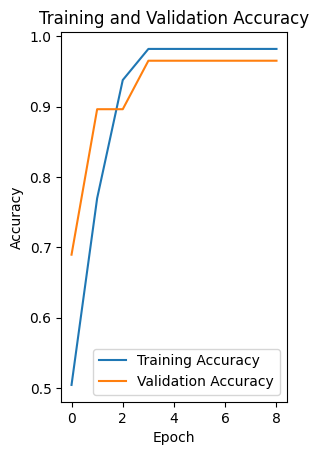

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()